In [1]:
import sqlite3
import folium
import pandas as pd
import plotly.graph_objects as go

In [3]:
conn = sqlite3.connect('/Users/Nick/Documents/Personal/Data/Ontario/RoadNet/ORNELEM-FGDB/LIO-2019-07-23/ontario_road_net.db')

In [4]:
query = """
select acqtech, Count(*) count, min(accuracy) min_acc, avg(accuracy) avg_acc, max(accuracy) max_acc
from `mississauga_roads`
group by acqtech
"""
df_accuracy = pd.read_sql_query(query, conn)

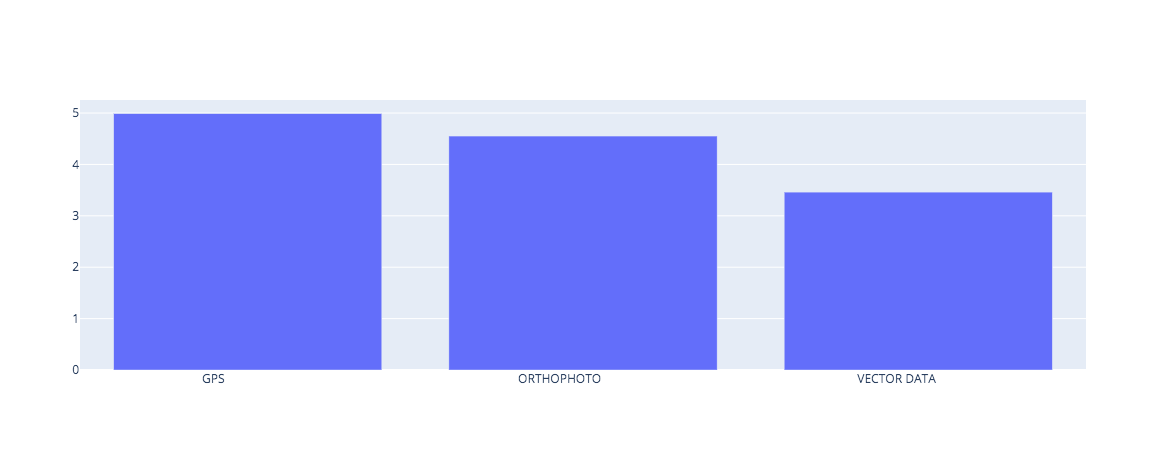

In [7]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_accuracy['acqtech'], y=df_accuracy['avg_acc']))

In [ ]:
query = """
select mr.ORN_ROAD_NET_ELEMENT_ID, mr.ORIGINAL_STREET_NAME StreetName
    , junct.LATITUDE_DECIMAL_DEGREES Latitude1, junct.LONGITUDE_DECIMAL_DEGREES Longitude1, junct.JUNCTION_TYPE Type1
    , junct2.LATITUDE_DECIMAL_DEGREES Latitude2, junct2.LONGITUDE_DECIMAL_DEGREES Longitude2, junct2.JUNCTION_TYPE Type2
from `mississauga_roads` mr
inner join `junction` junct
on mr.from_jct=junct.JUNCTION_ID
inner join `junction` junct2
on mr.to_jct=junct2.JUNCTION_ID
"""
df_junctions = pd.read_sql_query(query, conn)